Hypothesis test result (h): 0
p-value: 0.9550
KS Statistic: 0.1496


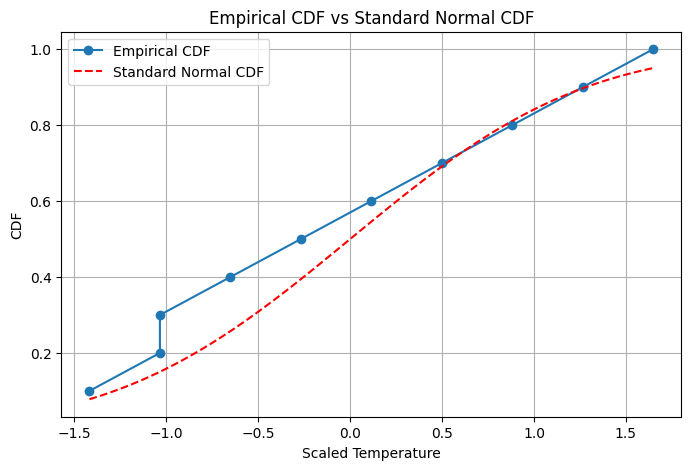

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

# Step 1 & 2: Load and Extract the Temperature Data
temperatures = np.array([15, 17, 16, 14, 18, 20, 19, 15, 21, 22])

# Step 3: Center and Scale the Data (Z-score normalization)
mean_temp = np.mean(temperatures)
std_temp = np.std(temperatures)
scaled_data = (temperatures - mean_temp) / std_temp

# Step 4: Perform the One-Sample K-S Test
# Testing against the standard normal distribution
ks_stat, p_value = kstest(scaled_data, 'norm')

# Step 5: Output the Results
h = int(p_value < 0.05)  # 0 = fail to reject null, 1 = reject null
print(f"Hypothesis test result (h): {h}")
print(f"p-value: {p_value:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")

# Step 6: Plot Empirical CDF vs Standard Normal CDF
sorted_data = np.sort(scaled_data)
empirical_cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.figure(figsize=(8, 5))
plt.plot(sorted_data, empirical_cdf, marker='o', linestyle='-', label='Empirical CDF')
x = np.linspace(min(scaled_data), max(scaled_data), 100)
plt.plot(x, norm.cdf(x), 'r--', label='Standard Normal CDF')
plt.title('Empirical CDF vs Standard Normal CDF')
plt.xlabel('Scaled Temperature')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()
